# Satander Customer Satisfaction 

https://www.kaggle.com/competitions/santander-customer-satisfaction/overview


The premise of my challenge was to predict and identify dissatified and unsatisfied customers in their banking experience. By doing so this will allow Santander bank to take the required steps to improve customer satisfaction. 

I was provided with three csv files "train, test and sample submission". My train data consisted of 371 feautures, a target column and consisted of 76,020 rows. The size of the data set was also 119.04 MB.
I identified that my datset was a binary classification problem and was a numerical dataset. 

# Dataloading and Initial look

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
#load data
df = pd.read_csv("train.csv")

In [207]:
#data set size
dataset_size = df.shape
print("Dataset Size:", dataset_size)

Dataset Size: (76020, 371)


In [208]:
#check for missing values
missing_data = df.isnull().sum()
# Check if there are any missing values
if missing_data.sum() > 0:
    print("Missing data found!")
    print(missing_data)
else:
    print("No missing data found.")

No missing data found.


In [209]:
# table of feautures
display(df)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


* Based on the table, the feautres are numerical with the values ranging anywhere from (0-120,000?)

In [210]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


* Yes, i do see outliers, based on the means being so small compared to the max values. This indicated the max value could be an outlier. An outlier is an extreme value in the dataset

* There is definently a class imbalane in the data set with the data set leaning more towards the 0/1 ? Column

* The Target is encoded with 0s. and the Target column is the variable to predict

In [211]:
# any duplicates 
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# Data Visualization


Number of category 0: 73012
Number of category 1: 3008


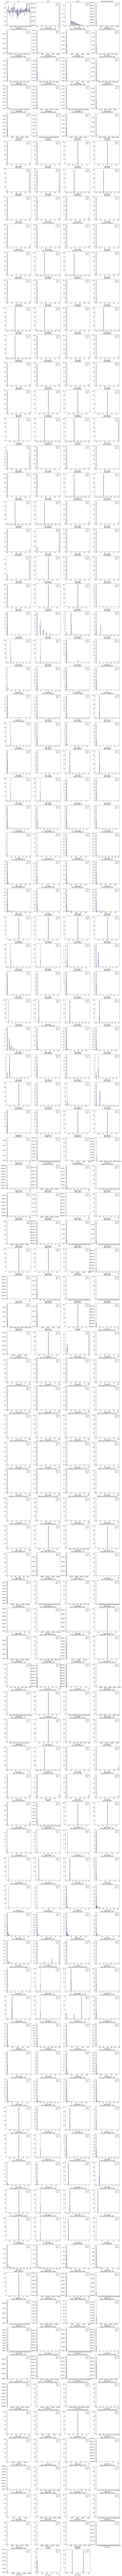

In [212]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compare_features_binary(d, logscale=False):
    # Get the target variable
    target = d["TARGET"]

    # Check if the target variable is a column name or an array of target values
    if isinstance(target, str):
        # Assuming target is the column name
        df_0 = d["Training"][d["Training"][target] == 0]
        df_1 = d["Training"][d["Training"][target] == 1]
    else:
        # Assuming target is an array of target values
        df_0 = d["Training"].loc[target == 0]
        df_1 = d["Training"].loc[target == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Calculate the number of features
    num_features = d["Training"].shape[1]

    # Calculate the number of plots per row
    num_plots_per_row = min(4, num_features)  # Maximum of 4 plots per row

    # Calculate the number of rows needed
    num_rows = math.ceil(num_features / num_plots_per_row)

    # Increase the size of individual plots
    plt.figure(figsize=(20, 5 * num_rows))

    # Plot histograms for raw outputs of each class
    for i, column in enumerate(df_0.columns):
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        plt.title(column)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=100, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel("Raw Output")

    plt.show()


d = {"Training":df, "TARGET": "TARGET"}
compare_features_binary(d)


what feautres look more promising for machine learning algorithm ?? 

In [213]:
#calculate feautre precentages 
train_data = pd.read_csv('train.csv')

# Calculate the percentages of unsatisfied and satisfied customers
unsatisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[0]
satisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[1]

# display the percentages
percentage_df = pd.DataFrame({
    'Category': ['Unsatisfied', 'Satisfied'],
    'Percentage': [unsatisfied_percentage, satisfied_percentage]
})

# Display the DataFrame
print(percentage_df)


      Category  Percentage
0  Unsatisfied   96.043147
1    Satisfied    3.956853


# Data cleaning and preparation

* Not much to clean in my data set, other than dropping unescarry columns (done in machine learning model)
* i dont think scaling would be critical for my data set since it consist of mostly 0s

# Machine learning model

Train logistic regression Algorithm 

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [245]:
# Load the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [246]:
print(train_df.columns) 

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)


In [266]:
#print(X_test.columns)

In [248]:
# Separate features (X) and target variable (y) for training data
X_train = train_df.drop(columns=['ID','TARGET'])
y_train = train_df['TARGET']
display(X_train.columns)

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [249]:
# Separate features (X) for test data
X_test = test_df.drop(columns=['ID'])  # Exclude unnecessary ID column
display(X_test.columns)

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [250]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [251]:
scaler = StandardScaler()

In [252]:
scaler.fit(X_train)

StandardScaler()

In [253]:
#Transform both the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [273]:
# Defineclass weights
class_weights = {0: 0.1, 1: 0.9}  #Chnaging class weight has no affect on ROC score 

In [274]:
# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [275]:
# Train the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [276]:
#make predictions on validation data set
y_val_pred_proba = model.predict_proba(X_val_scaled)[:,1] # prediction for class

In [279]:
auc_roc = roc_auc_score(y_val, y_val_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.7919511117978136


In [262]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)

Shape of X_train: (60816, 369)
Shape of X_test: (75818, 369)
shape of X_test_scaled: (75818, 369)
Shape of X_train_scaled: (60816, 369)


In [263]:
X_test= scaler.transform(X_test_scaled)

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [264]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [265]:
# Populate submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'TARGET': y_pred
})

In [ ]:
#submission_df.to_csv('submission.csv', index=False)

Algorithm histogram

In [231]:
import sklearn.discriminant_analysis as DA
Fisher = DA.LinearDiscriminantAnalysis()

In [232]:
Fisher.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [233]:
Fisher.predict(X_val.to_numpy())

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


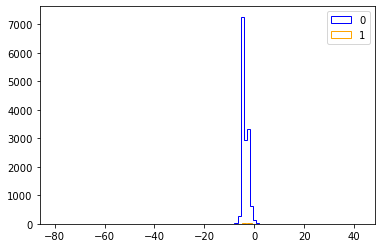

In [234]:
X_val_0 = X_val[y_val.to_numpy() == 0]  
X_val_1 = X_val[y_val.to_numpy() == 1]

plt.figure()

plt.hist(Fisher.decision_function(X_val_0.to_numpy()), bins=100, histtype="step", color="blue", label="0", stacked=True)

plt.hist(Fisher.decision_function(X_val_1.to_numpy()), bins=100, histtype="step", color="orange", label="1", stacked=True)

plt.legend(loc='upper right')

plt.show()
